### Group Project 

The goal for this notebook is to perform various functions individually using Markdown and Python 3 to write text and codes for visualisation and analysis.This project includes various datasets including the pandas module that supports data structures designed for handling the kind of data we'll be working with also using different libraries like Seaborn for visualizations  etc.

In [1]:
student_name = "Aditya Sharma"
student_id = "46199551"

**`Importing different Libraries.`**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

### Introduction for the NICS Dataset

Mandated by the Brady Handgun Violence Prevention Act of **1993** and launched by the **FBI** on **November 30, 1998**, NICS is used by Federal Firearms Licensees (FFLs) to instantly determine whether a prospective buyer is eligible to buy *firearms or explosives*. Before ringing up the sale, cashiers call in a check to the FBI or to other designated agencies to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. More than 100 million such checks have been made in the last decade, leading to more than 700,000 denials

The Dataset for the above can be found here- [FBI's National Instant Criminal Background Check System](https://www.fbi.gov/about-us/cjis/nics)

To download the Dataset - [Click here ](data/nics-firearm-background-checks.csv?raw=true)

![Image](img.jpg)

**`Loading the NICS dataset`**

In [3]:
nics = pd.read_csv('data/nics-firearm-background-checks.csv')
nics.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
14790,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
14791,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
14792,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
14793,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
14794,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


**`Checking NICS dataset Information and shape`**

In [4]:
nics.shape

(14795, 27)

In [5]:
nics[['Year','Month']] = nics.month.str.split("-",expand=True,)
nics.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Year,Month
0,2021-03,Alabama,42992.0,690.0,34675.0,20702.0,2048.0,1599,0.0,47.0,...,0.0,35.0,27.0,9.0,1.0,1.0,1.0,107474,2021,03
1,2021-03,Alaska,322.0,1.0,4375.0,4186.0,590.0,316,0.0,0.0,...,0.0,8.0,3.0,3.0,0.0,1.0,0.0,10170,2021,03
2,2021-03,Arizona,10118.0,699.0,32738.0,15268.0,2497.0,1746,0.0,20.0,...,0.0,27.0,17.0,4.0,0.0,0.0,0.0,65805,2021,03
3,2021-03,Arkansas,3712.0,1173.0,15039.0,9815.0,723.0,744,12.0,29.0,...,0.0,16.0,21.0,1.0,0.0,0.0,0.0,34134,2021,03
4,2021-03,California,17904.0,12669.0,50271.0,35334.0,7327.0,0,0.0,3.0,...,0.0,10623.0,4159.0,829.0,44.0,28.0,1.0,143742,2021,03


In [6]:
nics["Month"] = pd.to_numeric(nics["Month"], errors='coerce')
print(nics.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14795 entries, 0 to 14794
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      14795 non-null  object 
 1   state                      14795 non-null  object 
 2   permit                     14771 non-null  float64
 3   permit_recheck             3410 non-null   float64
 4   handgun                    14775 non-null  float64
 5   long_gun                   14776 non-null  float64
 6   other                      7810 non-null   float64
 7   multiple                   14795 non-null  int64  
 8   admin                      14772 non-null  float64
 9   prepawn_handgun            12852 non-null  float64
 10  prepawn_long_gun           12850 non-null  float64
 11  prepawn_other              7425 non-null   float64
 12  redemption_handgun         12855 non-null  float64
 13  redemption_long_gun        12854 non-null  flo

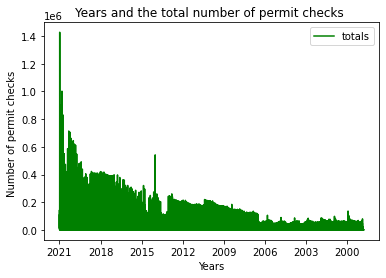

In [7]:
nics.plot("Year","totals" ,color = "green")
plt.xlabel("Years")  # add X-axis label
plt.ylabel("Number of permit checks ")  # add Y-axis label
plt.title("Years and the total number of permit checks ")  # add title 
plt.show()

##### Observations 
    From the above graph we can say that as years pass frequency of number of total permit checks also increases.

In [8]:
##sns.scatterplot(data=nics, x="state y="permit", hue="state")

In [9]:
#g=sns.catplot(data=nics, kind="swarm", x="totals", y="state")
#g.fig.set_figwidth(50)
#g.fig.set_figheight(50)

In [10]:
#f=sns.stripplot(data=nics,  x="totals", y="state", s=10, alpha=.5 ,edgecolor='gray')
#plt.text(3,0,"state vs total checks", fontsize = 15, color='Black', fontstyle='italic')

In [11]:
##nics["state"].value_counts().head(10).plot(kind="line")

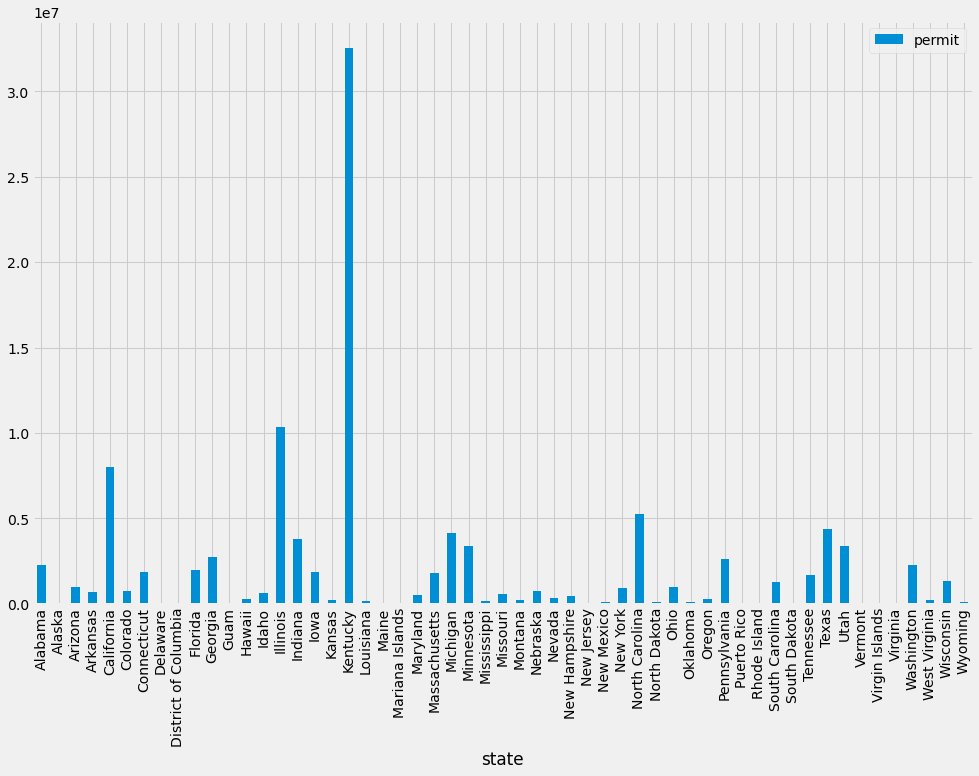

In [12]:
k=pd.pivot_table(values='permit',index='state',data=nics,aggfunc='sum')
plt.style.use('fivethirtyeight')
k.plot(kind='bar',figsize=(15,10))
plt.show()

In [13]:
nics.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Year,Month
0,2021-03,Alabama,42992.0,690.0,34675.0,20702.0,2048.0,1599,0.0,47.0,...,0.0,35.0,27.0,9.0,1.0,1.0,1.0,107474,2021,3
1,2021-03,Alaska,322.0,1.0,4375.0,4186.0,590.0,316,0.0,0.0,...,0.0,8.0,3.0,3.0,0.0,1.0,0.0,10170,2021,3
2,2021-03,Arizona,10118.0,699.0,32738.0,15268.0,2497.0,1746,0.0,20.0,...,0.0,27.0,17.0,4.0,0.0,0.0,0.0,65805,2021,3
3,2021-03,Arkansas,3712.0,1173.0,15039.0,9815.0,723.0,744,12.0,29.0,...,0.0,16.0,21.0,1.0,0.0,0.0,0.0,34134,2021,3
4,2021-03,California,17904.0,12669.0,50271.0,35334.0,7327.0,0,0.0,3.0,...,0.0,10623.0,4159.0,829.0,44.0,28.0,1.0,143742,2021,3


In [14]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
nics3=nics.loc[nics['state']!="Kentucky"]
nics3=nics.loc[nics['state']!="California"]
nics3=nics.loc[nics['state']!="Alabama"]
nics3=nics.loc[nics['state']!="Texas"]

In [15]:
nics3.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Year,Month
0,2021-03,Alabama,42992.0,690.0,34675.0,20702.0,2048.0,1599,0.0,47.0,...,0.0,35.0,27.0,9.0,1.0,1.0,1.0,107474,2021,3
1,2021-03,Alaska,322.0,1.0,4375.0,4186.0,590.0,316,0.0,0.0,...,0.0,8.0,3.0,3.0,0.0,1.0,0.0,10170,2021,3
2,2021-03,Arizona,10118.0,699.0,32738.0,15268.0,2497.0,1746,0.0,20.0,...,0.0,27.0,17.0,4.0,0.0,0.0,0.0,65805,2021,3
3,2021-03,Arkansas,3712.0,1173.0,15039.0,9815.0,723.0,744,12.0,29.0,...,0.0,16.0,21.0,1.0,0.0,0.0,0.0,34134,2021,3
4,2021-03,California,17904.0,12669.0,50271.0,35334.0,7327.0,0,0.0,3.0,...,0.0,10623.0,4159.0,829.0,44.0,28.0,1.0,143742,2021,3


plt.style.use('fivethirtyeight')
total=pd.pivot_table(nics,values={'permit'},index='state',columns={'state'},aggfunc='sum')
labels=[]
for i in total.index:
    labels.append(i)
dist = pdist(total,'euclidean')
linkage_matrix = linkage(dist,method = 'complete')
plt.figure(figsize=(16,11))
dendrogram(linkage_matrix,labels=labels)
plt.xticks(rotation=90)
plt.show()

## Cleaning DataSet

Dropping various Columns and rows
- Dropping rows before year 2000 for analysis 
- Checking and removing NaN values 
- Removing various variables which are not needed

In [16]:
nics=nics.dropna() 
print(nics.shape)
print(nics.isna().sum())

(3080, 29)
month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
Year                         0
Month                        0
dtype: int64


**`Splitting the Month and Year column`**

*Splitting the data will help us in analyzing and joining easily with other datasets in future.*

In [17]:
nics['date'] = nics['Year'].map(str) + '-' + nics['Month'].map(str)
x2 = nics.set_index('date')
x2.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Year,Month
date,,,,,,,,,,,,,,,,,,,,,
2016-8,2016-08,Virginia,776.0,0.0,21108.0,15802.0,978.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38667,2016,8
2016-8,2016-08,Washington,14063.0,33.0,15083.0,11376.0,1622.0,606,8.0,6.0,...,0.0,503.0,444.0,23.0,11.0,4.0,1.0,46645,2016,8
2016-8,2016-08,West Virginia,1948.0,0.0,6916.0,5283.0,243.0,345,14.0,9.0,...,0.0,3.0,1.0,0.0,0.0,2.0,0.0,17315,2016,8
2016-8,2016-08,Wisconsin,25551.0,0.0,14764.0,12079.0,709.0,43,0.0,0.0,...,0.0,4.0,5.0,0.0,0.0,0.0,0.0,53689,2016,8
2016-8,2016-08,Wyoming,906.0,3.0,1721.0,2079.0,105.0,96,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5295,2016,8


In [18]:
x2.shape

(3080, 29)

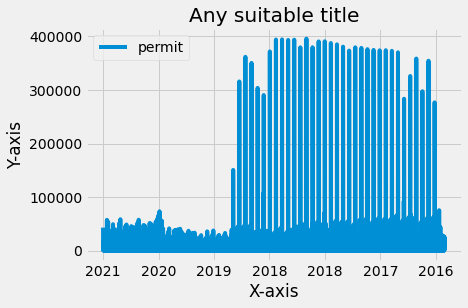

In [19]:
x2.plot("Year", "permit")
plt.xlabel("X-axis")  # add X-axis label
plt.ylabel("Y-axis")  # add Y-axis label
plt.title("Any suitable title")  # add title
plt.show()

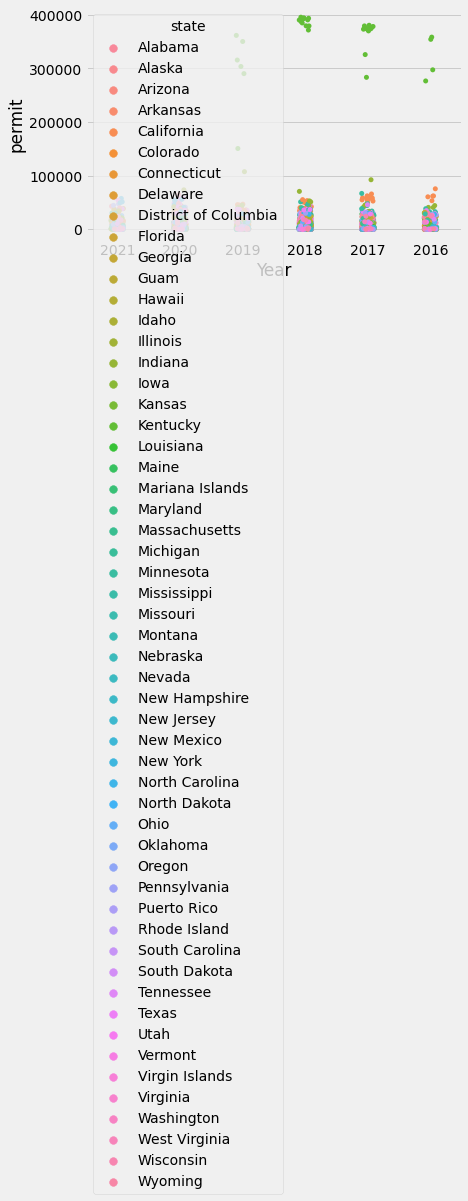

In [20]:
ax = sns.stripplot(x="Year", y="permit", hue="state", data=nics)

### Rest of the project is done on the main Project file.